In [6]:
from google.colab import files
uploaded = files.upload()


Saving coffee_sales.csv to coffee_sales (1).csv


In [7]:
# ---------------------------------------
# 1. DATA COLLECTION & LOADING
# ---------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("coffee_sales.csv")

# View first few rows
print(data.head())


         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [8]:
# ---------------------------------------
# 2. DATA PREPARATION AND CLEANING
# ---------------------------------------

# Check for missing values
print("\n Missing values:\n", data.isnull().sum())

# Fill missing numerical values
data['money'].fillna(data['money'].median(), inplace=True)

# Fill missing categorical values
data['cash_type'].fillna(data['cash_type'].mode()[0], inplace=True)
data['coffee_name'].fillna(data['coffee_name'].mode()[0], inplace=True)
data['card'].fillna("ANON-UNKNOWN", inplace=True)

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Drop full datetime if not needed
data.drop(columns=['datetime'], inplace=True)

# Remove outliers using Z-score
from scipy.stats import zscore
data = data[(np.abs(zscore(data[['money']])) < 3).all(axis=1)]

# Feature engineering: extract Month and Year
data['Month'] = data['date'].dt.month
data['Year'] = data['date'].dt.year

# Drop original date
data.drop(columns=['date'], inplace=True)



 Missing values:
 date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


<ipython-input-8-57618695158d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['money'].fillna(data['money'].median(), inplace=True)
<ipython-input-8-57618695158d>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

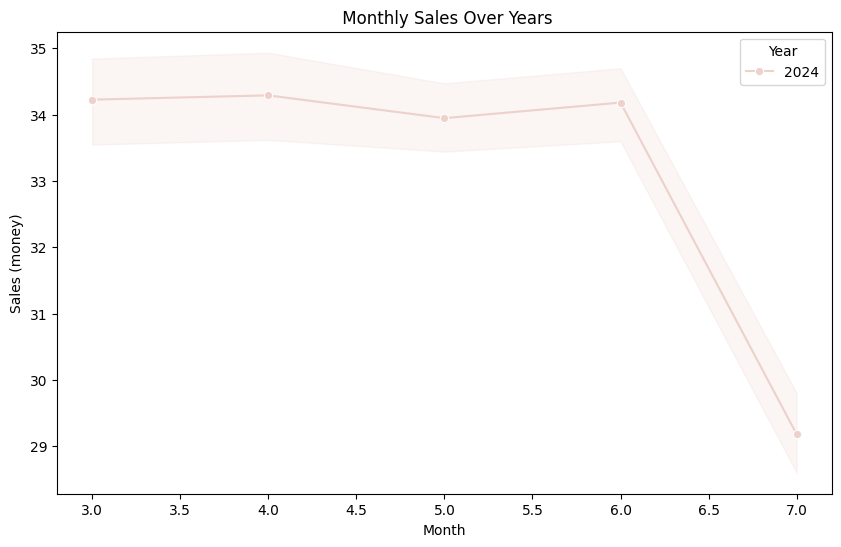

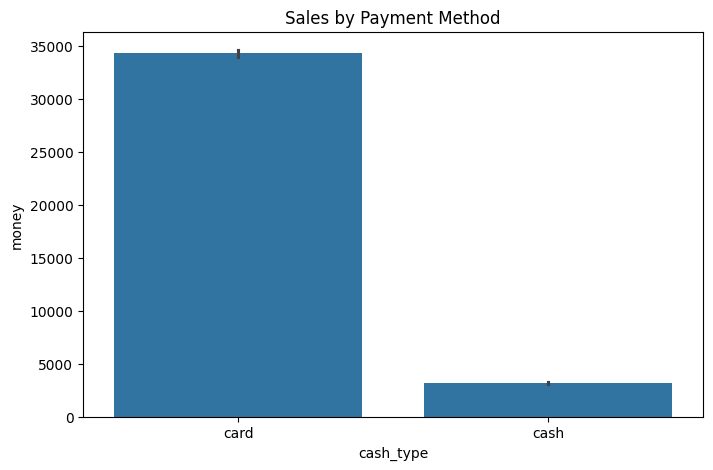

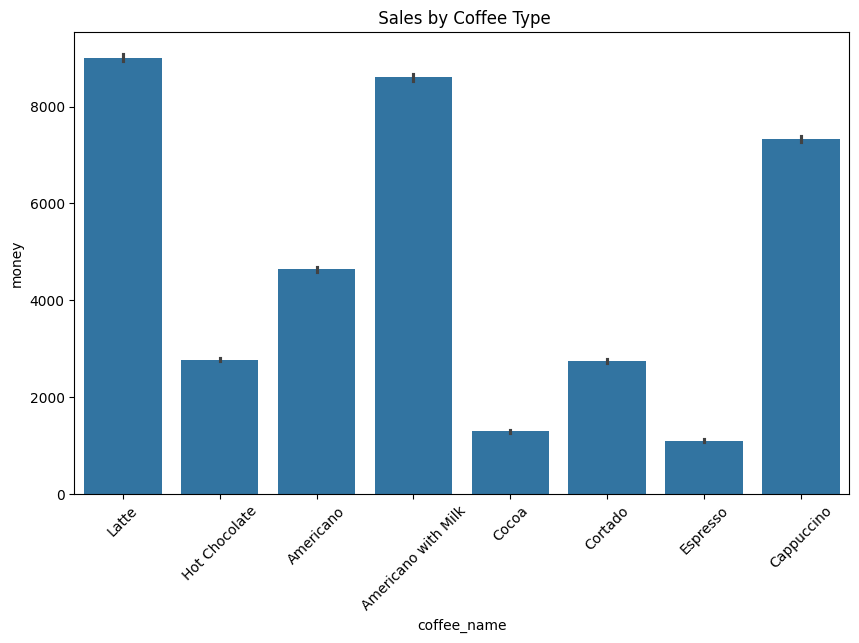

In [9]:
# ---------------------------------------
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ---------------------------------------

# Sales (money) by month/year
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Month', y='money', hue='Year', marker='o')
plt.title(" Monthly Sales Over Years")
plt.ylabel("Sales (money)")
plt.show()

# Sales by payment type
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='cash_type', y='money', estimator=sum)
plt.title("Sales by Payment Method")
plt.show()

# Sales by coffee type
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='coffee_name', y='money', estimator=sum)
plt.title(" Sales by Coffee Type")
plt.xticks(rotation=45)
plt.show()


In [12]:
# ---------------------------------------
# 4. MACHINE LEARNING MODELING
# ---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = data.drop(columns=['money'])
y = data['money']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")



 Model Evaluation:
Mean Squared Error: 1.41
R² Score: 0.9242


In [13]:
# ---------------------------------------
# 5. MODEL INTERPRETATION
# ---------------------------------------
# Feature importances (coefficients)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n Model Coefficients:\n")
print(coefficients.sort_values(by='Coefficient', ascending=False))



 Model Coefficients:

                                 Coefficient
coffee_name_Cocoa                  10.361270
coffee_name_Cappuccino             10.033369
coffee_name_Latte                  10.003384
coffee_name_Hot Chocolate           9.965029
coffee_name_Americano with Milk     5.324335
...                                      ...
card_ANON-0000-0000-0412           -3.012008
card_ANON-0000-0000-0355           -3.148944
card_ANON-0000-0000-0405           -3.148944
card_ANON-0000-0000-0398           -3.148944
coffee_name_Espresso               -5.150275

[456 rows x 1 columns]
